<a href="https://colab.research.google.com/github/adeepH/DravidianOffensive/blob/main/Notebooks/CM-TRA/Kannada/IndicBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers==3.3.1

     |████████████████████████████████| 1.1MB 7.5MB/s 
     |████████████████████████████████| 1.2MB 48.3MB/s 
     |████████████████████████████████| 901kB 52.3MB/s 
     |████████████████████████████████| 3.0MB 51.8MB/s 


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
!git clone https://github.com/adeepH/DravidianOffensive.git

Cloning into 'DravidianOffensive'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (217/217), done.
remote: Compressing objects: 100% (201/201), done.
remote: Total 217 (delta 96), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (217/217), 10.48 MiB | 3.88 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [4]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [5]:
train=pd.read_csv('/content/DravidianOffensive/Datasets/Pseudo Labels/Pseudo_kan.csv')
train['labels']=LabelEncoder().fit_transform(train['labels']) 
#for i in range(len(train)):
#  train['tweets'][i]=train['tweets'][i][8:-2]
train=train.drop(columns=['Unnamed: 0'])
train

,tweets,labels
0,Tik tok alli jagala madtidralla adra baggenu o...,0
1,Anyone from kerala here,5
2,Movie rerelease madi plss,0
3,Amazon prime alli bittidira....yella manele no...,0
4,Guru sure news nanu tik tok dawn lod madeda ya...,0
...,...,...
14761,{'kn': '1ಎಟ್ ತೆಲೆಗ್ರಾಂ ಅಪ್ಪಿ ಕ್ಲೋಸ್ ಮಾಡ್ಸಿ ಆಮೇ...,0
14762,{'kn': 'ಸೂಪರ್ ತೊಗರಿ ಟಿಪ್ಪ'},0
14763,ಭಾರತ್ರಜ್ ತ್ ಬಿಎ ಕಿಟ್ಕೋಬೇಕಷ್ಟೆ ನೀನು ಬಂದಿ ನಂದು,0
14764,{'kn': 'ರಶ್ಮಿಕ ಎಲ್ಲಿಡ್ಡೆಯಕ್ಕ🤣🥀ನಂಕ್ರಾಕ್ಷಿತ್ ಶೆಟ...,0


In [6]:
train.labels.value_counts()

0    11437
5     1751
2      820
1      374
4      245
3      139
Name: labels, dtype: int64

In [7]:
val=pd.read_csv('/content/DravidianOffensive/Datasets/Trans_kan_test.csv')
val['labels']=LabelEncoder().fit_transform(val['label'])
val['tweets']=val['Sentence']
for i in range(len(val)):
  val['tweets'][i]=val['tweets'][i][8:-2]
val=val.drop(columns=['label','Unnamed: 0','transliterated','Sentence'])
val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,labels,tweets
0,1,ಜೈ ರೋಗಿ ಇಸ್ಲಾಂ ಸಾಯಿಸಿ ಇದೆ ಇವರ ಗು
1,1,e vedio nodinu mathe chaina apps use madidre....
2,0,na yenu thappila yela sari agi hellidira sup
3,5,r super super super sup
4,5,(KANNADA RAP 201
...,...,...
773,0,start maadalu capacity growth maadalu tips kod...
774,2,idanna nodi thi*a urkimbeku🤣🤣🤣
775,5,ou s
776,0,ೋದ್ರೆ ಸಾವಿರಾರು lyrical video ಗ


In [8]:
import pandas as pd
from torch.utils.data import Dataset,DataLoader

class RFDataset(Dataset):
  def __init__(self,tweets,labels,tokenizer,max_len):
    self.tweets = tweets
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.tweets)
  
  def __getitem__(self,item):
    tweets = str(self.tweets[item])
    labels = self.labels[item]

    encoding = self.tokenizer.encode_plus(
        tweets,
        add_special_tokens=True,
        max_length = self.max_len,
        return_token_type_ids = False,
        padding = 'max_length',
        return_attention_mask= True,
        return_tensors='pt',
        truncation=True
    )

    return {
        'tweets' : tweets,
        'input_ids' : encoding['input_ids'].flatten(),
        'attention_mask' : encoding['attention_mask'].flatten(),
        'labels' : torch.tensor(labels,dtype=torch.long)

    }

In [9]:
 
print('Training set size:',train.shape)
#Uncomment the next line when we have the test data
#print('Testing set size:',test.shape)
print('validation set size:',val.shape)

Training set size: (14766, 2)
validation set size: (778, 2)


In [10]:
import numpy as np

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  np.unique(train.labels.values),
                                                  train.labels.values)
class_weights

array([ 0.21517881,  6.5802139 ,  3.00121951, 17.70503597, 10.04489796,
        1.40548258])

In [11]:
def create_data_loader(df,tokenizer,max_len,batch_size,shuffle=True):
  ds = RFDataset(
      tweets = df.tweets.to_numpy(),
      labels = df.labels.to_numpy(),
      tokenizer = tokenizer,
      max_len = max_len
  )

  return DataLoader(ds,
                    batch_size = batch_size,
                    shuffle = shuffle,
                    num_workers=4)

In [12]:
from transformers import XLNetTokenizer,XLNetModel,AdamW,get_linear_schedule_with_warmup,AutoModel,AutoTokenizer
device = 'cuda'
PRE_TRAINED_MODEL_NAME = 'ai4bharat/indic-bert'
tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)


In [13]:
BATCH_SIZE = 64
MAX_LEN = 128
train_data_loader = create_data_loader(train,tokenizer,MAX_LEN,BATCH_SIZE)
val_data_loader = create_data_loader(val,tokenizer,MAX_LEN,BATCH_SIZE,shuffle=False)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [14]:
BERT_model = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [15]:
import torch.nn as nn
class RFClassifier(nn.Module):
  def __init__(self, n_classes):
    super(RFClassifier, self).__init__()
    self.auto = AutoModel.from_pretrained('ai4bharat/indic-bert')
    self.lstm = nn.LSTM(768, 256, batch_first=True,bidirectional=True)
    self.linear = nn.Linear(256*2, 128)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.4)
    self.out = nn.Linear(128, n_classes)
  
  def forward(self, input_ids, attention_mask):
    sequence_output, pooled_output = self.auto(input_ids, 
               attention_mask=attention_mask)

    # sequence_output has the following shape: (batch_size, sequence_length, 768)
    lstm_output, (h,c) = self.lstm(sequence_output) ## extract the 1st token's embeddings
    hidden = torch.cat((lstm_output[:,-1, :256],lstm_output[:,0, 256:]),dim=-1)
    linear_output = self.linear(lstm_output[:,-1].view(-1,256*2)) ### assuming that you are only using the output of the last LSTM cell to perform classification

    return linear_output

In [16]:
model =RFClassifier(5)
model = model.to(device)

In [17]:
EPOCHS = 5
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [18]:
def train_epoch(model,data_loader,loss_fn,optimizer,device,scheduler,n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for data in data_loader:
        input_ids = data['input_ids'].to(device)
        attention_mask = data['attention_mask'].to(device)
        labels = data['labels'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
            )
        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs,labels)

        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

In [19]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      labels = d["labels"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, labels)
      correct_predictions += torch.sum(preds == labels)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [20]:
import time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [21]:
from collections import defaultdict
import torch
 
history = defaultdict(list)
best_accuracy = 0
for epoch in range(EPOCHS):
 
 
  start_time = time.time()
  train_acc,train_loss = train_epoch(
      model,
      train_data_loader,
      loss_fn,
      optimizer,
      device,
      scheduler,
      len(train)
  )
   
 
  val_acc,val_loss = eval_model(
      model,
      val_data_loader,
      loss_fn,
      device,
      len(val)
  )

  end_time = time.time()
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)
  print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
  print(f'Train Loss {train_loss} accuracy {train_acc}')
  print(f'Val Loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

if train_acc > best_accuracy:
    best_accuracy = train_acc
torch.save(model.state_dict(),'distilbert-base-multilingual-cased.bin')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 01 | Epoch Time: 2m 48s
Train Loss 0.8872437179088593 accuracy 0.8096979547609373
Val Loss 1.0807276184742267 accuracy 0.6131105398457584

Epoch: 02 | Epoch Time: 2m 48s
Train Loss 0.48552840986809176 accuracy 0.8524312610050115
Val Loss 1.0069636473288903 accuracy 0.6478149100257069

Epoch: 03 | Epoch Time: 2m 48s
Train Loss 0.4153481561255145 accuracy 0.8725450358932684
Val Loss 0.9521100062590379 accuracy 0.6632390745501285

Epoch: 04 | Epoch Time: 2m 48s
Train Loss 0.3612839410250837 accuracy 0.8887985913585263
Val Loss 0.9851536934192364 accuracy 0.6632390745501285

Epoch: 05 | Epoch Time: 2m 48s
Train Loss 0.31751736008372655 accuracy 0.9017337125829609
Val Loss 1.0319610146375804 accuracy 0.6670951156812339



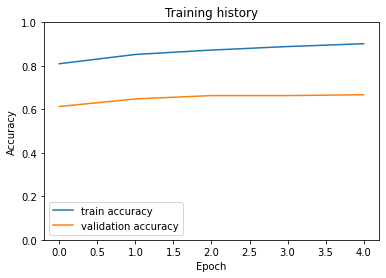

In [22]:
import matplotlib.pyplot as plt
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [23]:
val_acc, _ = eval_model(
  model,
  val_data_loader,
  loss_fn,
  device,
  len(val) #Change it to test when you have the test results
)
val_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.6670951156812339

In [24]:
def get_predictions(model, data_loader):
  model = model.eval()
  sentence = []
  predictions = []
  prediction_probs = []
  real_values = []
  with torch.no_grad():
    for d in data_loader:
      tweets = d["tweets"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      labels = d["labels"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      sentence.extend(tweets)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(labels)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return sentence, predictions, prediction_probs, real_values

In [25]:

y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  val_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred,zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.7038    0.7845    0.7420       427
           1     0.0000    0.0000    0.0000        44
           2     0.6400    0.4267    0.5120        75
           3     0.0000    0.0000    0.0000        14
           4     0.0000    0.0000    0.0000        33
           5     0.6129    0.8216    0.7021       185

    accuracy                         0.6671       778
   macro avg     0.3261    0.3388    0.3260       778
weighted avg     0.5937    0.6671    0.6235       778

